<a href="https://colab.research.google.com/github/Haile143/Orthopedic_KNN/blob/main/Ortho_KnnProjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading the libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

Section 1

In [2]:
# loading dataset
# making pandas DataFrame from the CSV
data=pd.read_csv('/content/drive/MyDrive/Knn project/ortho_knnnb.csv')

In [3]:
# How many variables does the dataset contain?
print("The dataset contains {} variables.".format(len(data.columns)))

The dataset contains 7 variables.


In [4]:
#What is the data about?
# its about Biomechanical Features of Orthopedic Patients

In [5]:
#What are we trying to predict here?
#classifying the given features are normal or abnormal 

Section II : Exploratory Data Analysis

In [6]:
#Perform some descriptive statistics and make a note of your findings
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [8]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


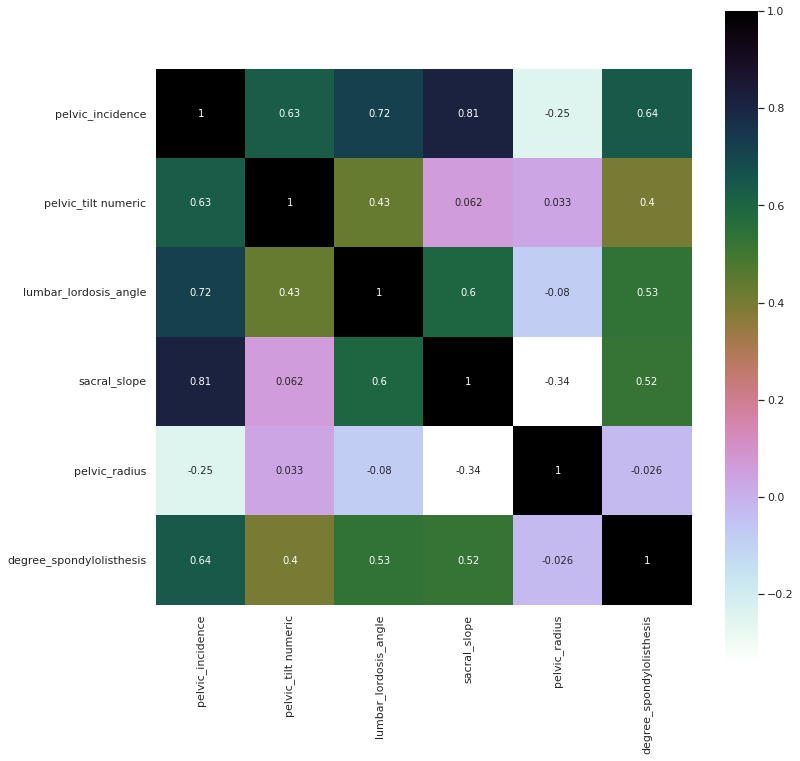

In [9]:
#Plot appropriate graphs to understand the relation between the variables.
corr=data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True,cmap ='cubehelix_r',square =True)
plt.show()

In [10]:
data['class']

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: class, Length: 310, dtype: object

In [11]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [12]:
#Make a new column symptom_class with the abnormal rows as 1 and the normal rows as 0, drop the class column
val = data.columns[data.dtypes == 'object']
df = pd.get_dummies(data, columns=val)
df.rename(columns={'class_Abnormal':'symptom_class'},inplace = True)
df.drop('class_Normal', axis = 1, inplace = True)

In [13]:
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [14]:
# Splitting the data set into independant variables and dependant variables:

x = df.drop('symptom_class', axis = 1)
y = df['symptom_class']

In [15]:
df['symptom_class'].value_counts()

1    210
0    100
Name: symptom_class, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(x,y)
print(y_sm.value_counts())

1    210
0    210
Name: symptom_class, dtype: int64


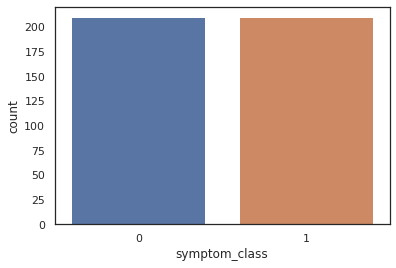

In [17]:
sns.countplot(y_sm)

Section IV : Training with KNN

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm, test_size=0.20, random_state = 1)


#### Feeding Model & get score

In [20]:
#Starting with three nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)

pred = KNN.predict(x_test)
from sklearn.metrics import accuracy_score
print(round(accuracy_score(pred,y_test)*100,2))

91.67


In [21]:
# Trying with K = 4
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)
pred = KNN.predict(x_test)
print(round(accuracy_score(pred,y_test)*100,2))

89.29


In [22]:
# Trying with K = 5
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
pred = KNN.predict(x_test)
print(round(accuracy_score(pred,y_test)*100,2))

91.67


#### Ploting rconfusion_matrix result

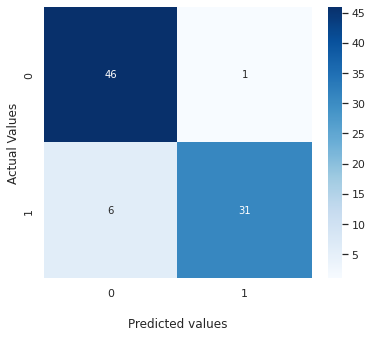

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(6,5))
ax = sns.heatmap(cm, annot=True,cmap='Blues')
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual Values')
plt.show()

#### Naive B Classifier

In [24]:
# Importing Library
from sklearn.naive_bayes import GaussianNB


In [25]:
nb = GaussianNB()
nb.fit(x_train,y_train)

pred = nb.predict(x_test)


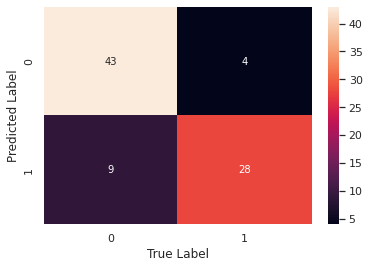

In [26]:
cm = confusion_matrix(y_test,pred)

sns.heatmap(cm, annot=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()